In [1]:
# imports
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 
import spacy, nltk, gensim, sklearn

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

/Users/amaellebidet/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Tests for wordcloud

In [2]:
year = 2018 # available: from 2015 to 2020
PATH_DATA = './data/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 5000
reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

In [4]:

i=0
for chunk in reader:
    if i: 
        df_0 = chunk
        break
    else: i=1

In [10]:
df_0.quotation[5000]

"We really were rooting for Khloé. And we still are. She's so strong and she's doing the best she can. It's a really sad situation all over. I kind of made this rule with my brother: if there's a baby involved, I'm not going talk -- I'm going to keep it cute and keep it classy and not talk too bad on [ the parent ] -- I'm going to try not to say anything too negative because one day, True is going to see this, and it's just, you know, so messed up."

In [11]:
text = ""

for quote in df_0.quotation:
    text = text + ' ' + quote

In [12]:
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [13]:
# Casefolding
text = text.lower()

In [14]:
# Remove words shorter than 3 characters
new_text = ' '.join([w for w in text.split() if len(w)>3])

In [15]:
# Stopwords removal 
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra",
            "wow", "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", 
            "ready","tell", "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate",
            "realize", "weekend", "song", "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news",
            "local", "global", "case",  "means", "billion","million","thousand","hard","film","good","close","hear","american"
            "african","change","u","s","united","state","lose","loose","happy","important"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1180
1180


In [16]:
#Creating a spacy object
doc = nlp(new_text)

In [9]:
# Tokenization : strings are encoded to hashes
tokens = [token.text for token in doc]

In [10]:
# Tokenization : strings are encoded to hashes + Part of speech tagging
pos_tagged = [(token.text, token.tag_) for token in doc]

In [11]:
# Lemmatization
# removing stop words and lematize
words = []
words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']

In [19]:
print(words[:100])

['kind', 'supportive', 'learn', 'fun', 'comment', 'lecturer', 'irritable', 'tense', 'worry', 'lot', 'want', 'class', 'act', 'appointment', 'year', 'go', 'like', 'little', 'doll', 'woman', 'dominate', 'world', 'young', 'try', 'different', 'thing', 'love', 'play', 'gon', 'na', 'drink', 'Budweisers', 'tomorrow', 'listen', 'gon', 'na', 'day', 'mourn', 'sister', 'yeah', 'go', 'particular', 'hit', 'talk', 'million', 'dollar', 'shave', 'gross', 'product', 'Success', 'woman', 'change', 'feel', 'thing', 'feel', 'like', 'successful', 'woman', 'round', 'human', 'feed', 'work', 'broad', 'way', 'interesting', 'underscore', 'need', 'work', 'female', 'faculty', 'base', 'Democratic', 'Party', 'african', 'american', 'woman', 'consistent', 'voter', 'election', 'voter', 'swing', 'state', 'budget', 'Governor', 'Lamont', 'present', 'General', 'Assembly', 'Wednesday', 'fully', 'compliant', 'exist', 'cap', 'engage', 'game', 'playing', 'gimmickry', 'haunt', 'state', 'decade']


In [13]:
text_wordcloud = ""

for element in words:
    text_wordcloud = text_wordcloud + ' ' + element

In [14]:
print(text_wordcloud[:2000])

 open conversation guard open conversation minute father coach japanese star talk happy intentive witness kid worker skype son kobe cool retire october 2009 week wife issue complain body clean pass inspection share lipstick gloss duchess ambition constantly rise achieve seemingly impossible aude perfect ambassador brand specifically innovative rechargeable handstick work flexible workplace allow support wife occasion transition child bear ability change hour schedule integral smooth transition primary school age child flexible workplace allow wife share drop pick duty involve circular activate child tear mum deprive wife mom picture blowing candle post facebook page love mature lens difficult trace legacy minefield latent misogyny wannabe imitator sexual misconduct couple normal love rub brother sister brother footstep son proud keep stewart leigha harris player beach area change audience adult child material starting frozen movie child book snow queen hans christian andersen escape gr

(-0.5, 399.5, 199.5, -0.5)

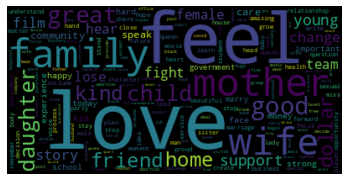

In [15]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text_wordcloud)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)

<Figure size 432x288 with 0 Axes>

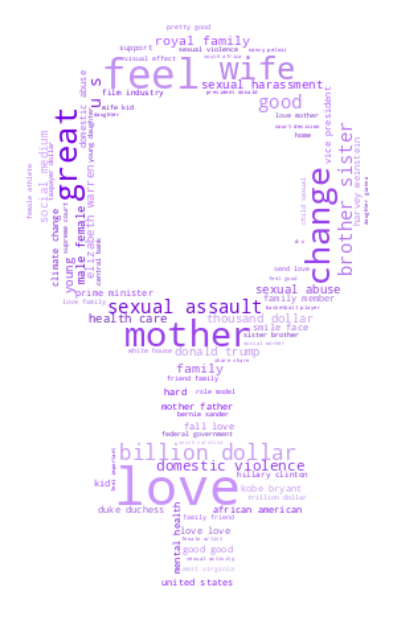

<Figure size 432x288 with 0 Axes>

In [16]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

figure(figsize=(12, 10), dpi=80)
d = PATH_DATA
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1, height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

# store to file
wc.to_file(path.join(d, "women_symbol.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

## Running a wordcloud for multiple chunks

In [3]:
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [4]:
year = 2017 # available: from 2015 to 2020
PATH_DATA = './data/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 250
reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

In [17]:
# Stopwords removal 
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow",
            "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", 
            "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", 
            "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"
            "united", "states","u.s","birthday","brother", "prime", "minister", "provide","hold","focus","hand","plan","loose","lose","saty"
            "virginia","west","thousand","billion","moment","speak","good","great","today","forward","backward","matter"
            "billion","million","thousand","hard","film","good","close","hear","american","african","change","u","s","united","state",
            "lose","loose","happy","important","white","visual","kobe","bryant","trillion"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1204
1204


In [7]:
j = 0
words = []
for chunk in reader:

    # Convert into single string text
    text = ""
    text = ' '.join(quote for quote in chunk.quotation)
    # Casefolding
    text = text.lower()
    # Remove words shorter than 3 characters
    new_text = ' '.join([w for w in text.split() if len(w)>3])   
       
    # Creating a spacy object
    doc = nlp(new_text)
    # Tokenizer
    tokens = [token.text for token in doc]
    # Lemmatization
    # removing stop words and lematize
    words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
    print(f'{j+1}/1000')
    j = j+1
    #if j == 1000:
    #    break


1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37/1000
38/1000
39/1000
40/1000
41/1000
42/1000
43/1000
44/1000
45/1000
46/1000
47/1000
48/1000
49/1000
50/1000
51/1000
52/1000
53/1000
54/1000
55/1000
56/1000
57/1000
58/1000
59/1000
60/1000
61/1000
62/1000
63/1000
64/1000
65/1000
66/1000
67/1000
68/1000
69/1000
70/1000
71/1000
72/1000
73/1000
74/1000
75/1000
76/1000
77/1000
78/1000
79/1000
80/1000
81/1000
82/1000
83/1000
84/1000
85/1000
86/1000
87/1000
88/1000
89/1000
90/1000
91/1000
92/1000
93/1000
94/1000
95/1000
96/1000
97/1000
98/1000
99/1000
100/1000
101/1000
102/1000
103/1000
104/1000
105/1000
106/1000
107/1000
108/1000
109/1000
110/1000
111/1000
112/1000
113/1000
114/1000
115/1000
116/1000
117/1000
118/1000
119/1000
120/1000
121/1000
122/1000
123/1000
1

In [8]:
text_wordcloud = ""

text_wordcloud = ' '.join(word for word in words)

<Figure size 432x288 with 0 Axes>

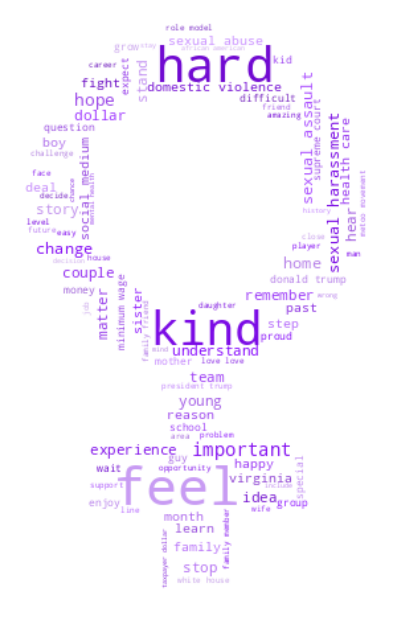

<Figure size 432x288 with 0 Axes>

In [19]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

figure(figsize=(12, 10))
d = PATH_DATA
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1, height=100,width=100,collocation_threshold=3).generate(text_wordcloud)

# store to file
wc.to_file(path.join(d, "women_symbol_thresh10.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

## Running a word cloud per month on year dataset

In [ ]:
# imports
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 
import spacy, nltk, gensim, sklearn

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

/Users/amaellebidet/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
PATH_DATA = './data/'
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [ ]:
# Stopwords removal 
PATH_STOPWORD = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH_STOPWORD, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow",
            "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", 
            "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", 
            "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"
            "united", "states","u.s","birthday","brother", "prime", "minister", "provide","hold","focus","hand","plan","loose","lose","saty"
            "virginia","west","thousand","billion","moment","speak","good","great","forward","backward","matter"
            "billion","thousand","hard","film","good","close","hear","american","african","change","u","s","united","state",
            "lose","loose","happy","important","white","visual","kobe","bryant","trillion","past","future","easy","matter","level","experience",
            "enjoy","month","group","step","amazing","reason","question","answer","stand","mind","wind","sun","sea","mountains"
            "castle", "mansion", "stop", "start", "idea","concept","form","ireland","north","sixty6","nightlife","belfast","telegraph","cuckoo",
            "nan", "nov", "dec", "cathedral", "story", "lady","roxy","write", "grow", "ago", "age", "include", "quarter","northern","december",
            "november","january", "today", "tomorrow","parlour","expect","win","sister","brother","decide", "national", "shine", "october", "february"
            "april", "may", "june", "july", "september", "garage", "alibi", "shiro", "onion", "friend", "remember", "book", "miss", "guy", "nice", "gallery",
            "line", "taxpayer", "walk", "half", "whole", "wait", "wrong", "lead", "program", "NaN","mom", "boy", "girl", "stuff", "school", "learn", "feel", "understand"
            "character", "young", "trouble", "event", "bad", "sound", "ira", "checkpoint", "sit", "head", "kind", "team", "bot", "mum","problem",
            "create", "botanic", "human", "deal", "term","mail","history","finally","daugther","think","stay","leave","face", "pick","special","city","indivisdual",
            "understand", "push","put","area","result","movie", "begin", "end"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1360
1360


In [ ]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

In [ ]:
year = 2018 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [ ]:
for month in ('01','02','03','04','05','06','07','08','09','10','11','12'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

In [ ]:
year = 2019 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [ ]:
for month in ('01','02','03','04','05','06','07','08','09','10','11','12'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

In [ ]:
year = 2020 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [ ]:
for month in ('01','02','03','04'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

Note: Month datasets are not of the same sizes, which introduces another bias: different bumber of chunks (more than 400 for january 2015 while only 15 for january 2016)
Words appear bigger, larger for datasets composed of more quotes --> mother, love, family more generic words appear logically

In [1]:
# imports
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 
import spacy, nltk, gensim, sklearn

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

/Users/amaellebidet/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
PATH_DATA = './data/'
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [3]:
# Stopwords removal 
PATH_STOPWORD = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH_STOPWORD, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow",
            "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", 
            "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", 
            "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"
            "united", "states","u.s","birthday","brother", "prime", "minister", "provide","hold","focus","hand","plan","loose","lose","saty"
            "virginia","west","thousand","billion","moment","speak","good","great","forward","backward","matter"
            "billion","thousand","hard","film","good","close","hear","american","african","change","u","s","united","state",
            "lose","loose","happy","important","white","visual","kobe","bryant","trillion","past","future","easy","matter","level","experience",
            "enjoy","month","group","step","amazing","reason","question","answer","stand","mind","wind","sun","sea","mountains"
            "castle", "mansion", "stop", "start", "idea","concept","form","ireland","north","sixty6","nightlife","belfast","telegraph","cuckoo",
            "nan", "nov", "dec", "cathedral", "story", "lady","roxy","write", "grow", "ago", "age", "include", "quarter","northern","december",
            "november","january", "today", "tomorrow","parlour","expect","win","sister","brother","decide", "national", "shine", "october", "february"
            "april", "may", "june", "july", "september", "garage", "alibi", "shiro", "onion", "friend", "remember", "book", "miss", "guy", "nice", "gallery",
            "line", "taxpayer", "walk", "half", "whole", "wait", "wrong", "lead", "program", "NaN","mom", "boy", "girl", "stuff", "school", "learn", "feel", "understand"
            "character", "young", "trouble", "event", "bad", "sound", "ira", "checkpoint", "sit", "head", "kind", "team", "bot", "mum","problem",
            "create", "botanic", "human", "deal", "term","mail","history","finally","daugther","think","stay","leave","face", "pick","special","city","indivisdual",
            "understand", "push","put","area","result","movie", "begin", "end"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1360
1360


In [4]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

In [5]:
year = 2018 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [6]:
for month in ('01','02','03','04','05','06','07','08','09','10','11','12'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

In [7]:
year = 2019 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [8]:
for month in ('01','02','03','04','05','06','07','08','09','10','11','12'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

In [9]:
year = 2020 # available: from 2015 to 2020
YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [10]:
for month in ('01','02','03','04'):
    
    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
    print(f'month {month} start\n')

    j = 0
    words = []
    for chunk in reader:

        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+f"{month}_thresh5_v2.png"))

    print(f'month {month} wordcloud figure saved \n')

month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

Note: Month datasets are not of the same sizes, which introduces another bias: different bumber of chunks (more than 400 for january 2015 while only 15 for january 2016)
Words appear bigger, larger for datasets composed of more quotes --> mother, love, family more generic words appear logically

## Running a wordcloud for before METOO

In [1]:
# imports
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 
import spacy, nltk, gensim, sklearn

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

/Users/amaellebidet/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
PATH_DATA = './data/'
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [3]:
# Stopwords removal 
PATH_STOPWORD = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH_STOPWORD, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow",
            "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", 
            "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", 
            "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"
            "united", "states","u.s","birthday","brother", "prime", "minister", "provide","hold","focus","hand","plan","loose","lose","saty"
            "virginia","west","thousand","billion","moment","speak","good","great","forward","backward","matter"
            "billion","thousand","hard","film","good","close","hear","american","african","change","u","s","united","state",
            "lose","loose","happy","important","white","visual","kobe","bryant","trillion","past","future","easy","matter","level","experience",
            "enjoy","month","group","step","amazing","reason","question","answer","stand","mind","wind","sun","sea","mountains"
            "castle", "mansion", "stop", "start", "idea","concept","form","ireland","north","sixty6","nightlife","belfast","telegraph","cuckoo",
            "nan", "nov", "dec", "cathedral", "story", "lady","roxy","write", "grow", "ago", "age", "include", "quarter","northern","december",
            "november","january", "today", "tomorrow","parlour","expect","win","sister","brother","decide", "national", "shine", "october", "february"
            "april", "may", "june", "july", "september", "garage", "alibi", "shiro", "onion", "friend", "remember", "book", "miss", "guy", "nice", "gallery",
            "line", "taxpayer", "walk", "half", "whole", "wait", "wrong", "lead", "program", "NaN","mom", "boy", "girl", "stuff", "school", "learn", "feel", "understand"
            "character", "young", "trouble", "event", "bad", "sound", "ira", "checkpoint", "sit", "head", "kind", "team", "bot", "mum","problem",
            "create", "botanic", "human", "deal", "term","mail","history","finally","daugther","think","stay","leave","face", "pick","special","city","indivisdual",
            "understand", "push","put","area","result","movie", "begin", "end"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1360
1360


In [4]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

In [5]:
CHUNK_SIZE = 250

figure(figsize=(12, 10))
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

<Figure size 864x720 with 0 Axes>

In [6]:
text_wordcloud_general = ""

for year in (2015, 2016, 2017):
    
    YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
    
    if(year == 2017):
        month_list = ('01','02','03','04','05','06','07','08','09')
    else : month_list = ('01','02','03','04','05','06','07','08','09','10','11','12')
    
    text_wordcloud_year = ""

    for month in month_list:
    
        MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
        RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
        reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
        print(f'month {month} start\n')

        j = 0
        words = []
        for chunk in reader:

            # Convert into single string text
            text = ""
            text = ' '.join(quote for quote in chunk.quotation)
            # Casefolding
            text = text.lower()
            # Remove words shorter than 3 characters
            new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
            # Creating a spacy object
            doc = nlp(new_text)
            # Tokenizer
            tokens = [token.text for token in doc]
            # Lemmatization
            # removing stop words and lematize
            words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
            print(f'{j+1} chunk')
            j = j+1

        print(f'month {month} done \n')
    
        text_wordcloud_year = ' '.join(word for word in words)
        text_wordcloud_general = ' '.join(word for word in words)
    
        print(f'month {month} added\n')
    
    print(f'Year {year} wordcloud processing \n')
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
                    stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud_year)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+"wordcloud.png"))

    print(f'year {year} wordcloud figure saved \n')

print(f'General pre-MeToo wordcloud processing \n')
# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
                    stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud_general)

# store to file
wc.to_file(path.join(PATH_DATA, "Pre_MeToo_wordcloud.png"))

print('General pre-MeToo wordcloud figure saved \n')


month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

## Running a wordcloud for after METOO

In [9]:
text_wordcloud_general = ""

for year in (2017, 2018, 2019, 2020):
    
    YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 
    
    if(year == 2020):
        month_list = ('01','02','03','04')
    else: 
        if(year == 2017):
            month_list = ('10','11','12')
        
        else : 
            month_list = ('01','02','03','04','05','06','07','08','09','10','11','12')
    
    text_wordcloud_year = ""

    for month in month_list:
    
        MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
        RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
        reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')
    
        print(f'month {month} start\n')

        j = 0
        words = []
        for chunk in reader:

            # Convert into single string text
            text = ""
            text = ' '.join(quote for quote in chunk.quotation)
            # Casefolding
            text = text.lower()
            # Remove words shorter than 3 characters
            new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
            # Creating a spacy object
            doc = nlp(new_text)
            # Tokenizer
            tokens = [token.text for token in doc]
            # Lemmatization
            # removing stop words and lematize
            words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
            print(f'{j+1} chunk')
            j = j+1

        print(f'month {month} done \n')
    
        text_wordcloud_year = ' '.join(word for word in words)
        text_wordcloud_general = ' '.join(word for word in words)
    
        print(f'month {month} added\n')
    
    print(f'Year {year} wordcloud processing \n')
    # Generate Wordcloud
    wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
                    stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud_year)

    # store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+"wordcloud.png"))

    print(f'year {year} wordcloud figure saved \n')

print(f'General pre-MeToo wordcloud processing \n')
# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
                    stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud_general)

# store to file
wc.to_file(path.join(PATH_DATA, "Post_MeToo_wordcloud.png"))

print('General post-MeToo wordcloud figure saved \n')


month 10 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
101 chunk
102 chunk
103 chunk
104 chunk
105 chunk
106 chunk
107 chunk
108 chunk
109 chunk
11

## Running a wordcloud for 2017 alone

In [11]:
year=2017

YEAR_QUOTES_FOLDER = PATH_DATA + f'{year}/' 

month_list = ('01','02','03','04','05','06','07','08','09','10','11','12')

text_wordcloud_year = ""

for month in month_list:

    MONTH_QUOTES_FILE = YEAR_QUOTES_FOLDER + f'{year}_' + f'{month}.json.bz2'
    RESULTS_FOLDER = YEAR_QUOTES_FOLDER + 'Wordclouds/'
    reader = pd.read_json(MONTH_QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

    print(f'month {month} start\n')
    j = 0
    words = []
    for chunk in reader:
        # Convert into single string text
        text = ""
        text = ' '.join(quote for quote in chunk.quotation)
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
   
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                and str(token) != '-PRON-' and str(token) != '`']
                
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud_year = ' '.join(word for word in words)
    
    print(f'month {month} added\n')
    
print(f'Year {year} wordcloud processing \n')
# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
                stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=5).generate(text_wordcloud_year)

# store to file
wc.to_file(path.join(RESULTS_FOLDER, f"{year}_"+"wordcloud.png"))

print(f'year {year} wordcloud figure saved \n')


month 01 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
month 01 done 

month 01 added

month 02 start

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
